# Part II - Explanatory Analysis on Loan Data from Prosper
## by Joshua Uduehi

## Investigation Overview

The goal with this presentation is to demonstrate the relationship of monthly loan payments (*MonthlyLoanPayment*) to itself and other features in the dataset. Those features are *CreditGrade*, *CurrentCreditLines*, and *BorrowerAPR*. Some key findings from the data analysis showed that the distribution of values for *MonthlyLoanPayment* have a median and mode around $200, *CreditGrade* had a negatively correlated relationship with *MonthlyLoanPayment*, and that *CurrentCreditLines* and *BorrowerAPR* are mostly positively correlated to *MonthlyLoanPayment*.


## Dataset Overview and Executive Summary

This dataset is about different loans from Prosper, collected by Udacity. The data can be found here: https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv. There is also a variable dictionary to explain the 81 variables in the dataset: https://video.udacity-data.com/topher/2023/December/6571fe24_prosper-loan-data-variable-definitions/prosper-loan-data-variable-definitions.xlsx. Records in this dataset deal with loans and various attributes associated with the loans. Questions that I want to answer in this dataset are about loan information, borrower information, and lender information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

## Histogram of MonthlyLoanPayment

> This histogram plots the distribution of monthly loan payments found under the *MonthlyLoanPayment* feature.

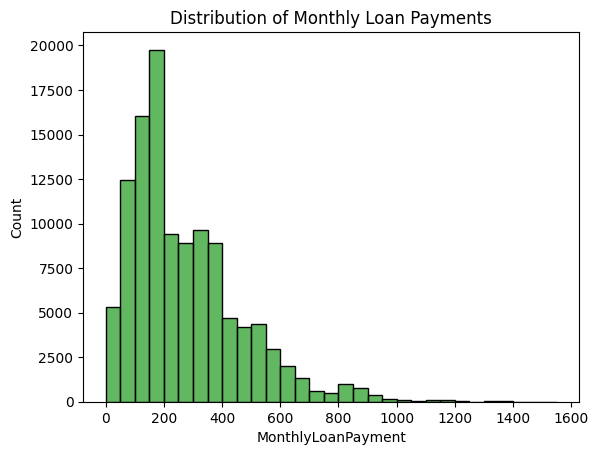

In [3]:
#histogram of MonthlyLoanPayment
bins = np.arange(0, 1600, 50)
sns.histplot(data=df, x='MonthlyLoanPayment',bins=bins, color='tab:green')
plt.title('Distribution of Monthly Loan Payments');

## Box Plot of CreditGrade and MonthlyLoanPayment

> This box plot displays the relationship between the *CreditGrade* and *MonthlyLoanPayment* features.

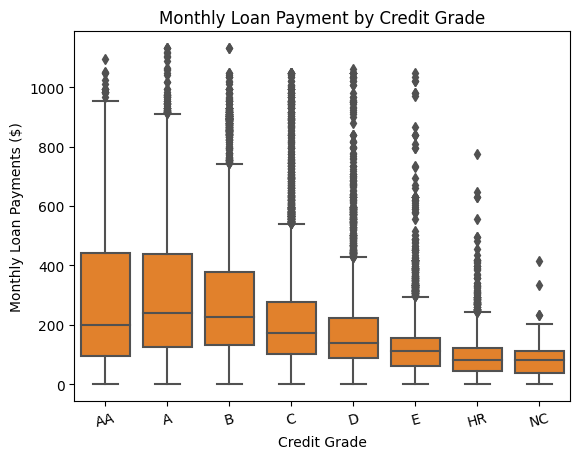

In [4]:
#box plot of MonthlyLoanPayment and CreditGrade
credit_types = ['AA', 'A', 'B', 'C', 'D','E','HR','NC']

# Returns the types for credit_types with the categories and orderedness
credit_classes = pd.CategoricalDtype(ordered=True, categories=credit_types)

# Use pandas.astype() to convert the "CreditGrade" column from a plain object type into an ordered categorical type 
df['CreditGrade'] = df['CreditGrade'].astype(credit_classes);

ax1 = sns.boxplot(data=df, x='CreditGrade', y='MonthlyLoanPayment', color='tab:orange')
plt.xticks(rotation=15)
plt.ylim(ax1.get_ylim())
plt.xlabel('Credit Grade')
plt.ylabel('Monthly Loan Payments ($)')
plt.title('Monthly Loan Payment by Credit Grade');

## Plot Matrix of BorrowerAPR, CurrentCreditLines, and MonthlyLoanPayment

> This plot matrix demonstrates the relationship between BorrowerAPR, CurrentCreditLines, and MonthlyLoanPayment

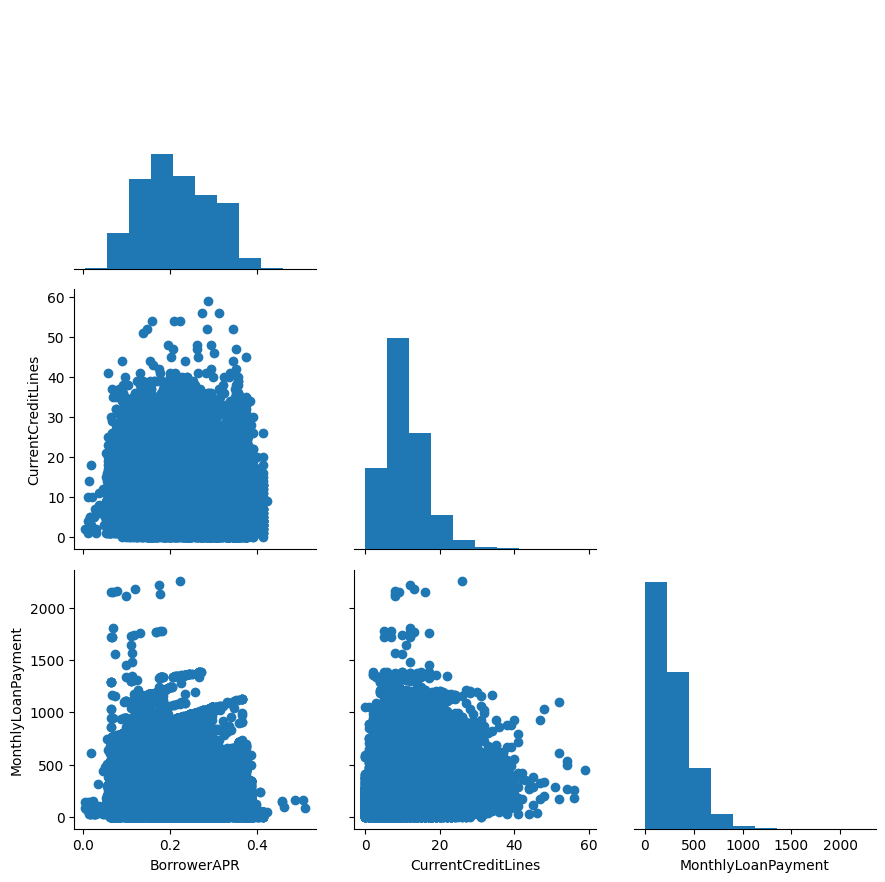

In [6]:
#Plot matrix of BorrowerAPR, CurrentCreditLines, MonthlyLoanPayment
g = sns.PairGrid(data=df, 
                 vars=['BorrowerAPR', 'CurrentCreditLines', 'MonthlyLoanPayment'],
                 height=3,
                 corner=True,
                 dropna=True,
                )
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_II_notebook.html or pdf


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command above will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
